In [45]:
import pandas as pd
import numpy as np

In [46]:
dataset_name = '1063'
time_split = '10m'
csv_file_path = f'/home/cc/clio/runs/raw/tencent/characteristic/{dataset_name}/{time_split}/characteristic.csv'
df_data = pd.read_csv(csv_file_path)
df_data

,num_io,start_time,end_time,ts_unit,duration,read_count,write_count,read_ratio,write_ratio,read_write_ratio,...,write_iat_p60,write_iat_p70,write_iat_p75,write_iat_p80,write_iat_p90,write_iat_p95,write_iat_p99,write_iat_p999,write_iat_p9999,write_iat_p100
0,513730,2.016100e+00,5.999987e+05,ms,599996.7258,379615,134115,0.7389,0.2611,2.8305,...,2.933026,3.746274e+00,4.293646e+00,4.993902e+00,7.533743e+00,1.104392e+01,3.322279e+01,5.636228e+02,1.681611e+03,2.191421e+03
1,498919,6.000000e+05,1.200000e+06,ms,599999.7081,369053,129866,0.7397,0.2603,2.8418,...,3.187519,4.058019e+00,4.640624e+00,5.378638e+00,8.036005e+00,1.156524e+01,3.371948e+01,5.305045e+02,1.566274e+03,1.942618e+03
2,166923,1.200000e+06,1.799008e+06,ms,599008.1594,122419,44504,0.7334,0.2666,2.7507,...,3.262911,4.253855e+00,5.014072e+00,6.145468e+00,1.295323e+01,3.418914e+01,4.198165e+02,1.902708e+03,2.270726e+03,2.540452e+03
3,70454,1.800000e+06,2.399005e+06,ms,599005.0280,51064,19390,0.7248,0.2752,2.6335,...,4.380022,6.701049e+00,8.899346e+00,1.291260e+01,4.507500e+01,1.559866e+02,1.158849e+03,2.013744e+03,2.212227e+03,2.212227e+03
4,128113,2.400000e+06,2.999000e+06,ms,599000.0000,101127,26986,0.7894,0.2106,3.7474,...,3.892222,5.389123e+00,6.660055e+00,8.759101e+00,2.392608e+01,7.569723e+01,8.442597e+02,2.220225e+03,3.032356e+03,3.034697e+03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1289,171241,7.788000e+08,7.793990e+08,ms,599009.2032,128460,42781,0.7502,0.2498,3.0027,...,3.333934,4.342237e+00,5.098610e+00,6.195178e+00,1.254484e+01,3.105940e+01,3.844181e+02,2.414653e+03,3.042595e+03,3.117322e+03
1290,147707,7.794000e+08,7.800000e+08,ms,599999.3264,113601,34106,0.7691,0.2309,3.3308,...,3.581171,4.722881e+00,5.607055e+00,6.960710e+00,1.570502e+01,4.395722e+01,5.634916e+02,2.568409e+03,3.020327e+03,3.028980e+03
1291,104751,7.800000e+08,7.805990e+08,ms,599034.4132,82814,21937,0.7906,0.2094,3.7751,...,3.806555,5.462684e+00,6.951392e+00,9.481559e+00,2.893490e+01,9.795444e+01,1.075426e+03,2.902075e+03,3.284515e+03,3.442737e+03
1292,91105,7.806000e+08,7.811998e+08,ms,599787.1000,68248,22857,0.7491,0.2509,2.9859,...,3.704571,5.499578e+00,7.177876e+00,1.010445e+01,3.327094e+01,1.151416e+02,1.036527e+03,2.065249e+03,2.559768e+03,2.742325e+03


# 1. Visualization of Data

In [47]:
import matplotlib.pyplot as plt

# Define categories and slice each category for visualization
categories = ['iops', 'read_write_ratio', 'write_size_ratio']
start_index = 0
end_index = 2000

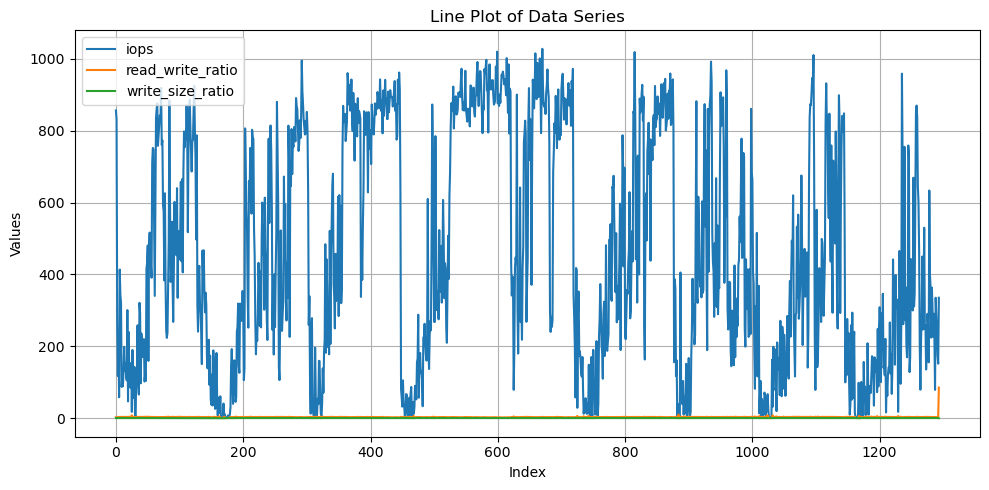

In [48]:
# Iterate through each category and plot
plt.figure(figsize=(10, 5))

for category in categories:
    data = df_data[category].iloc[start_index:end_index]  # Slice data for the current category
    plt.plot(data.index, data.values, label=category)

plt.title('Line Plot of Data Series')
plt.xlabel('Index')
plt.ylabel('Values')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

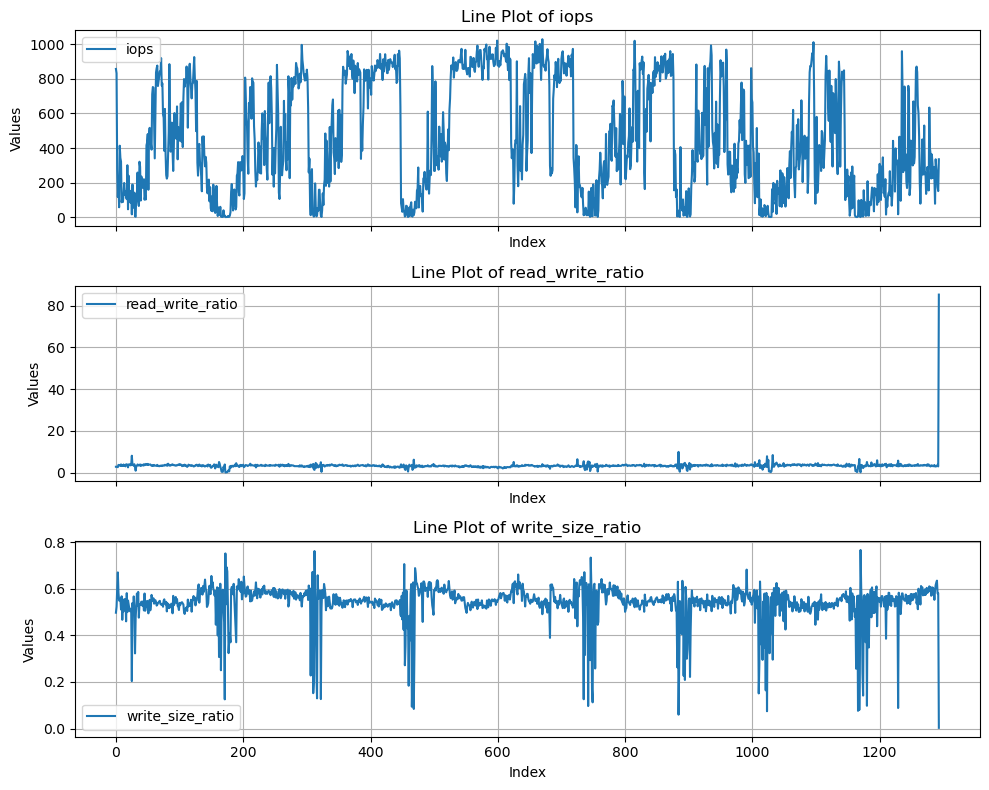

In [49]:
fig, axs = plt.subplots(len(categories), 1, figsize=(10, 8), sharex=True)

# Iterate through each category and plot in separate subplot
for idx, category in enumerate(categories):
    data = df_data[category].iloc[start_index:end_index]  # Slice data for the current category
    axs[idx].plot(data.index, data.values, label=category)
    axs[idx].set_title(f'Line Plot of {category}')
    axs[idx].set_xlabel('Index')
    axs[idx].set_ylabel('Values')
    axs[idx].legend()
    axs[idx].grid(True)

plt.tight_layout()
plt.show()

## 1.1 Preprocessing - FFT

In [50]:
from numpy.fft import *

def filter_signal(signal, threshold=1e8):
    fourier = rfft(signal)
    frequencies = rfftfreq(signal.size, d=20e-3/signal.size)
    fourier[frequencies > threshold] = 0
    return irfft(fourier)


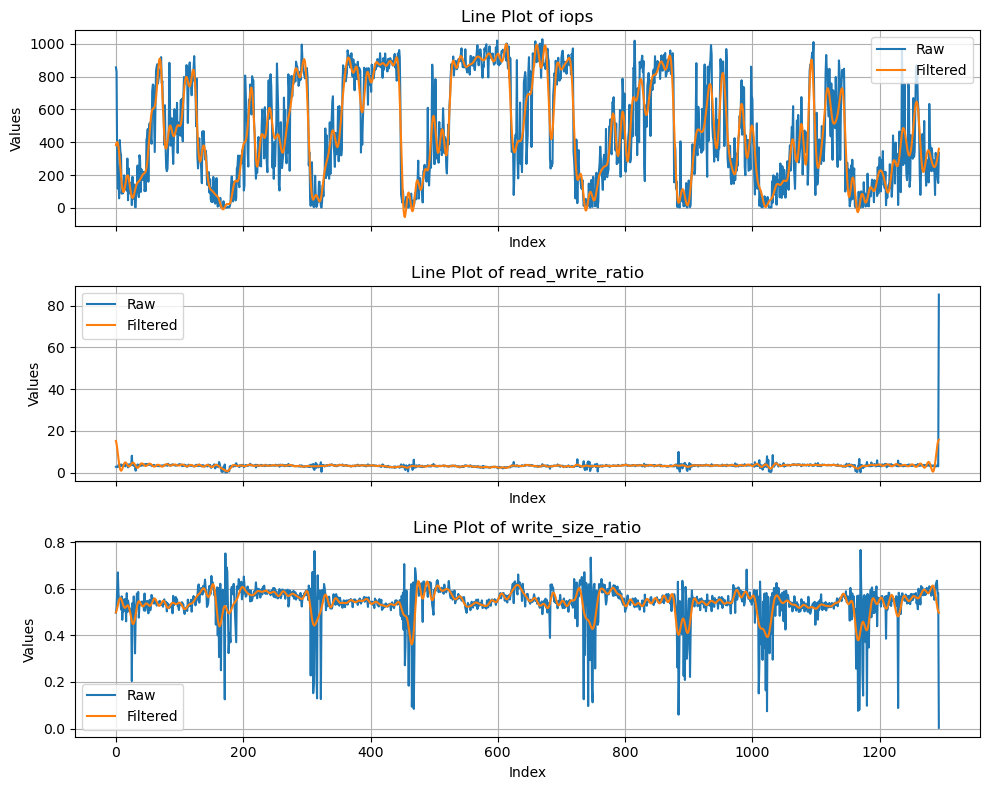

In [51]:
signals = df_data[categories].iloc[start_index:end_index]


fig, axs = plt.subplots(len(categories), 1, figsize=(10, 8), sharex=True)

# Iterate through each category and plot in separate subplot
for idx, category in enumerate(categories):
    
    signal = signals[category]
    filtered = filter_signal(signal, threshold=5000)
    axs[idx].plot(signal.index, signal.values, label='Raw')
    axs[idx].plot(signal.index, filtered, label='Filtered')
    axs[idx].set_title(f'Line Plot of {category}')
    axs[idx].set_xlabel('Index')
    axs[idx].set_ylabel('Values')
    axs[idx].legend()
    axs[idx].grid(True)

plt.tight_layout()
plt.show()


# 2. Univariate Feature Drift Detection

## 2.1 Drift Detection

In [52]:
from alibi_detect.cd import KSDrift

# select feature category, window length and step size
category = 'iops'
window_len = 120
step_size = 60

filtered = False
fft_threshold = 1000
filtered_data = filter_signal(df_data[category].iloc[0:window_len], threshold=fft_threshold)

In [53]:
if filtered:
    plt.figure(figsize=(15, 10))
    plt.plot(df_data[category].iloc[0:window_len], label='Raw')
    plt.plot(filtered_data, label='Filtered')
    plt.legend()
    plt.title("FFT Denoising with threshold = 1e4", size=15)
    plt.show()

In [54]:
ref_start = 0
ref_end = window_len
start = window_len
end = start + window_len
preds = []

while end < len(df_data):
    if filtered:
        data_ref = filter_signal(df_data[category].iloc[ref_start:ref_end], threshold=fft_threshold)
    else:
        data_ref = df_data[category].iloc[ref_start:ref_end].to_numpy()
    cd = KSDrift(data_ref, p_val=0.005)

    x = df_data[category].iloc[start:end].to_numpy()
    pred = cd.predict(x, drift_type='feature', return_p_val=True, return_distance=True)
    preds.append(pred)
    
    ref_start += step_size
    ref_end = ref_start + window_len
    start += step_size
    end = start + window_len
    

In [55]:
# Initialize lists to store data for plotting
window_indices = []
is_drift_values = []
p_val_values = []
distance_values = []
threshold_values = []

# Extract data for each prediction in preds
for idx, pred in enumerate(preds):
    window_indices.append(idx + 1)  # Assuming window index starts from 1
    is_drift_values.append(pred['data']['is_drift'][0])
    p_val_values.append(pred['data']['p_val'][0])
    distance_values.append(pred['data']['distance'][0])
    threshold_values.append(pred['data']['threshold'])

# Create a DataFrame from the lists
data_dict = {
    'Window_Index': window_indices,
    'Is_Drift': is_drift_values,
    'P_Value': p_val_values,
    'Distance': distance_values,
    'Threshold': threshold_values
}

df_preds = pd.DataFrame(data_dict)
df_preds

,Window_Index,Is_Drift,P_Value,Distance,Threshold
0,1,1,5.089932e-04,0.258333,0.005
1,2,0,1.402340e-02,0.200000,0.005
2,3,1,9.366713e-05,0.283333,0.005
3,4,1,1.677401e-04,0.275000,0.005
4,5,1,2.382811e-10,0.425000,0.005
5,6,0,4.455601e-02,0.175000,0.005
6,7,0,9.210886e-03,0.208333,0.005
7,8,1,1.313956e-11,0.450000,0.005
8,9,0,3.596470e-01,0.116667,0.005
9,10,1,1.473650e-09,0.408333,0.005


In [56]:
num_drifts = df_preds['Is_Drift'].sum()
print(f'Number of drifts detected: {num_drifts}')


Number of drifts detected: 11


In [57]:
# Get drift_window_indices and no_drift_window_indices from DataFrame
drift_window_indices = df_preds[df_preds['Is_Drift'] == 1]['Window_Index'].tolist()
no_drift_window_indices = df_preds[df_preds['Is_Drift'] == 0]['Window_Index'].tolist()

## 2.2 Visualization of Prediction

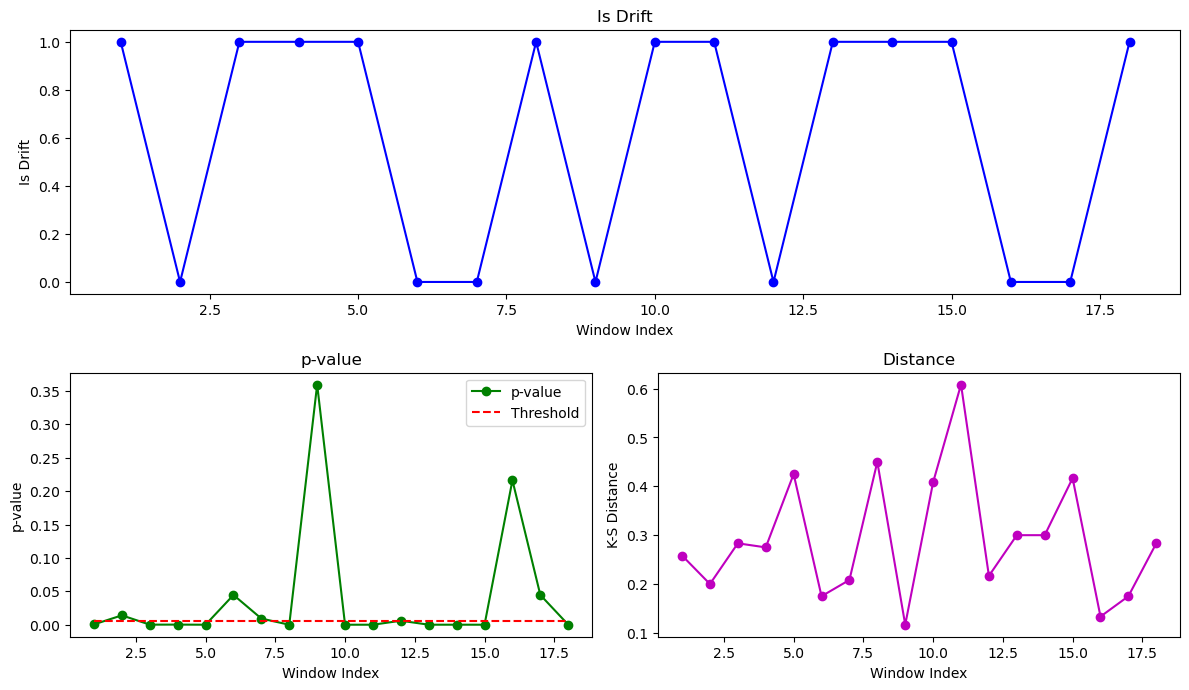

In [58]:
# Visualization example
plt.figure(figsize=(12, 10))

# Plot is_drift
plt.subplot(3, 1, 1)
plt.plot(window_indices, is_drift_values, marker='o', linestyle='-', color='b')
plt.title('Is Drift')
plt.xlabel('Window Index')
plt.ylabel('Is Drift')

# Plot p_val
plt.subplot(3, 2, 3)
plt.plot(window_indices, p_val_values, marker='o', linestyle='-', color='g', label='p-value')
plt.plot(window_indices, threshold_values, linestyle='--', color='r', label='Threshold')
plt.title('p-value')
plt.xlabel('Window Index')
plt.ylabel('p-value')
plt.legend()

# Plot distance
plt.subplot(3, 2, 4)
plt.plot(window_indices, distance_values, marker='o', linestyle='-', color='m')
plt.title('Distance')
plt.xlabel('Window Index')
plt.ylabel('K-S Distance')

plt.tight_layout()
plt.show()

In [59]:
drift_index = 2

if drift_index in drift_window_indices:
    print(f'Window {drift_index} is a drift window')

Distance: 0.20000000298023224
P-value: 0.014023403637111187


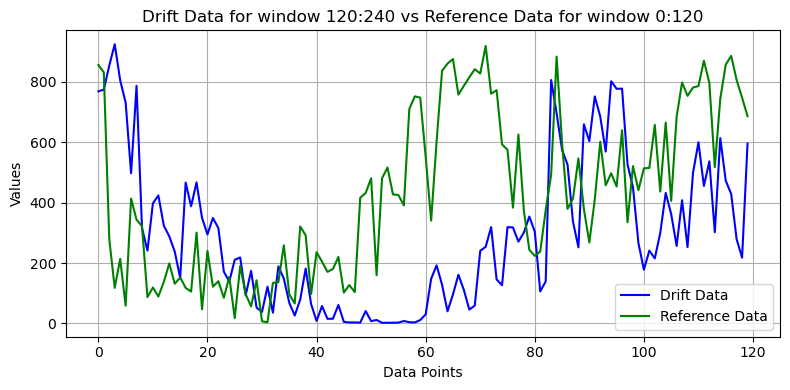

In [60]:
indices = np.arange(window_len)  # Assuming x-axis is indexed by data points

start = drift_index * step_size
end = start + window_len
ref_start = start - window_len
ref_end = start
if filtered:
    drift_data = filter_signal(df_data[category].iloc[start:end], threshold=fft_threshold)
    data_ref = filter_signal(df_data[category].iloc[ref_start:ref_end], threshold=fft_threshold)
else:
    drift_data = df_data[category].iloc[start:end].to_numpy()
    data_ref = df_data[category].iloc[ref_start:ref_end].to_numpy()

# Calculate rounded values for distance and keyvalue
rounded_distance = round(distance_values[drift_index - 1], 5)
rounded_keyvalue = p_val_values[drift_index - 1]

print(f'Distance: {rounded_distance}')
print(f'P-value: {rounded_keyvalue}')

# Plotting both drift data and reference data
plt.figure(figsize=(8, 4))
plt.plot(indices, drift_data, color='b', label='Drift Data')
plt.plot(indices, data_ref, color='g', label='Reference Data')
plt.title(f'Drift Data for window {start}:{end} vs Reference Data for window {ref_start}:{ref_end}')
plt.xlabel('Data Points')
plt.ylabel('Values')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

## 2.3 Visualization of Prediction by Ranking

In [61]:
# Rank the p-values from lowest to highest
df_sorted_pval = df_preds.sort_values(by='P_Value')

# Select the top five p-values and their corresponding window indices
top_five_drifts = df_sorted_pval.head(5)

top_five_drifts

,Window_Index,Is_Drift,P_Value,Distance,Threshold
10,11,1,7.816242e-22,0.608333,0.005
7,8,1,1.313956e-11,0.450000,0.005
4,5,1,2.382811e-10,0.425000,0.005
14,15,1,5.990097e-10,0.416667,0.005
9,10,1,1.473650e-09,0.408333,0.005


In [62]:
# Select the bottom five p-values and their corresponding window indices
top_five_non_drifts = df_sorted_pval.tail(5)

top_five_non_drifts

,Window_Index,Is_Drift,P_Value,Distance,Threshold
1,2,0,0.014023,0.200000,0.005
16,17,0,0.044556,0.175000,0.005
5,6,0,0.044556,0.175000,0.005
15,16,0,0.216302,0.133333,0.005
8,9,0,0.359647,0.116667,0.005


In [63]:
# Function to visualize drift data for given window indices
def visualize(window_indices, step_size, window_len, df_data, category='iops', visualize_type='Drift'):
    for window_index in window_indices:
        start = window_index * step_size
        end = start + window_len
        ref_start = start - window_len
        ref_end = start
        drift_data = df_data[category].iloc[start:end].to_numpy()
        data_ref = df_data[category].iloc[ref_start:ref_end].to_numpy()
        
        if ref_start < 0:
            continue
        
        print(f'Window Index: {window_index}, Start: {start}, End: {end}, Reference Start: {ref_start}, Reference End: {ref_end}')
        
        plt.figure(figsize=(8, 4))
        indices = np.arange(len(drift_data))  # Assuming x-axis is indexed by data points
        plt.plot(indices, drift_data, marker='o', linestyle='-', color='b', label=f'{visualize_type} Data Window {window_index}')
        plt.plot(indices, data_ref, marker='s', linestyle='--', color='g', label='Reference Data')
        plt.title(f'Drift Data for Window Index {window_index} ({start}:{end})')
        plt.xlabel('Data Points')
        plt.ylabel('Values')
        plt.legend()
        plt.grid(True)
        plt.tight_layout()
        plt.show()

Window Index: 11, Start: 660, End: 780, Reference Start: 540, Reference End: 660


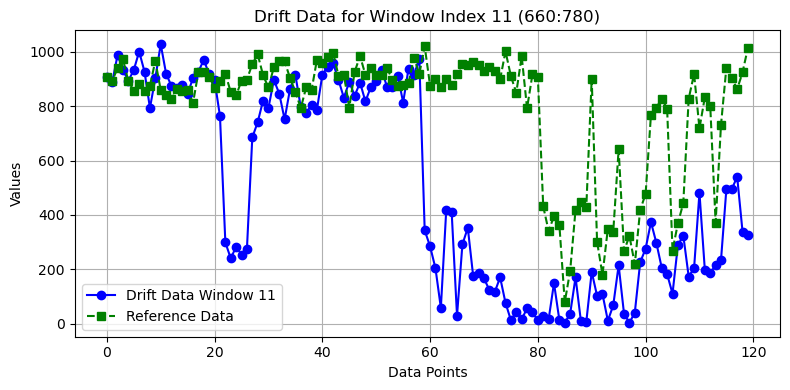

Window Index: 8, Start: 480, End: 600, Reference Start: 360, Reference End: 480


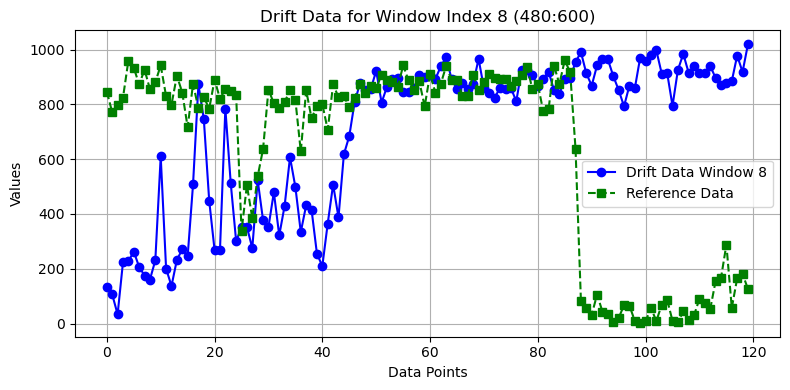

Window Index: 5, Start: 300, End: 420, Reference Start: 180, Reference End: 300


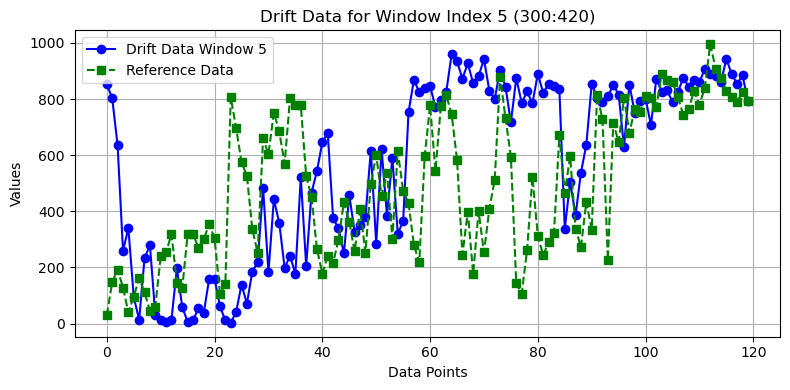

Window Index: 15, Start: 900, End: 1020, Reference Start: 780, Reference End: 900


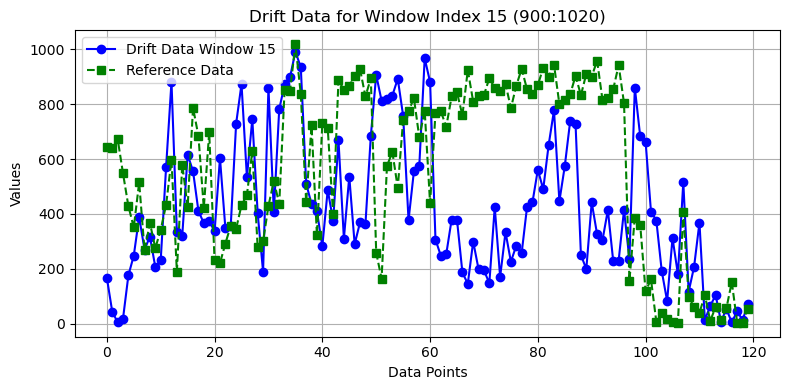

Window Index: 10, Start: 600, End: 720, Reference Start: 480, Reference End: 600


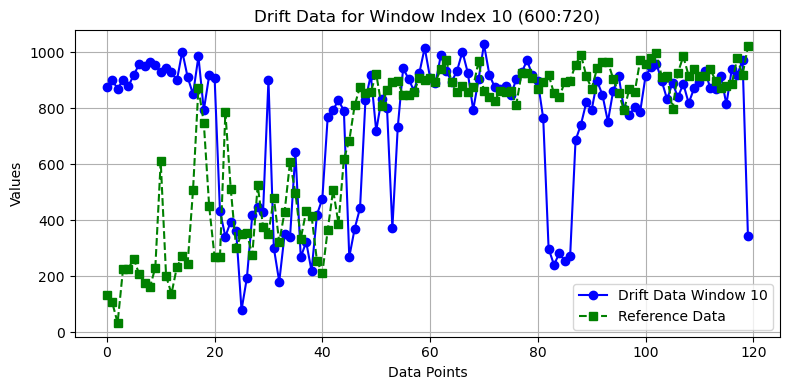

In [64]:
visualize(top_five_drifts['Window_Index'].tolist(), step_size, window_len, df_data, visualize_type='Drift')

Window Index: 2, Start: 120, End: 240, Reference Start: 0, Reference End: 120


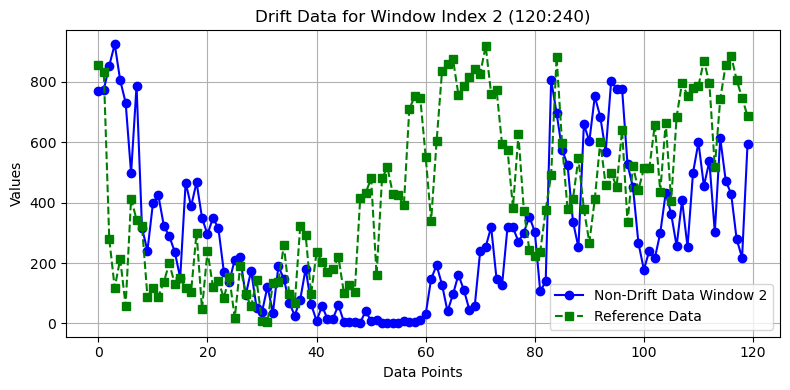

Window Index: 17, Start: 1020, End: 1140, Reference Start: 900, Reference End: 1020


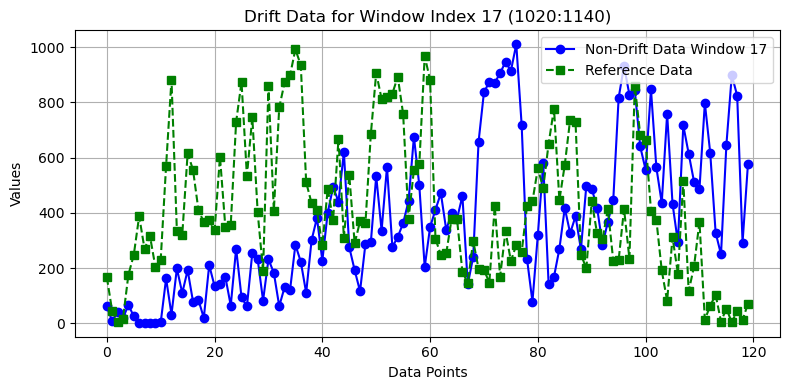

Window Index: 6, Start: 360, End: 480, Reference Start: 240, Reference End: 360


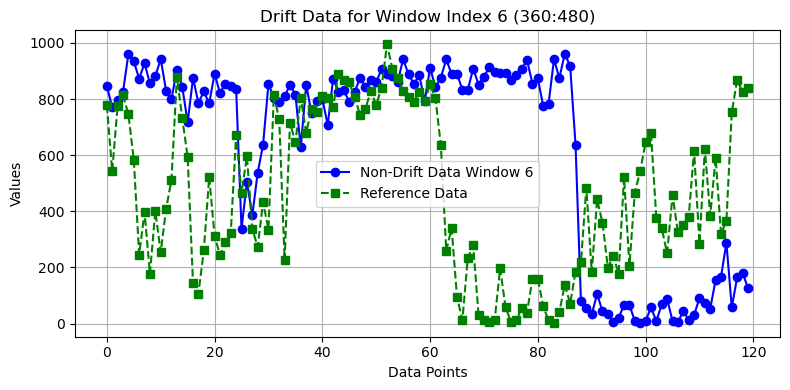

Window Index: 16, Start: 960, End: 1080, Reference Start: 840, Reference End: 960


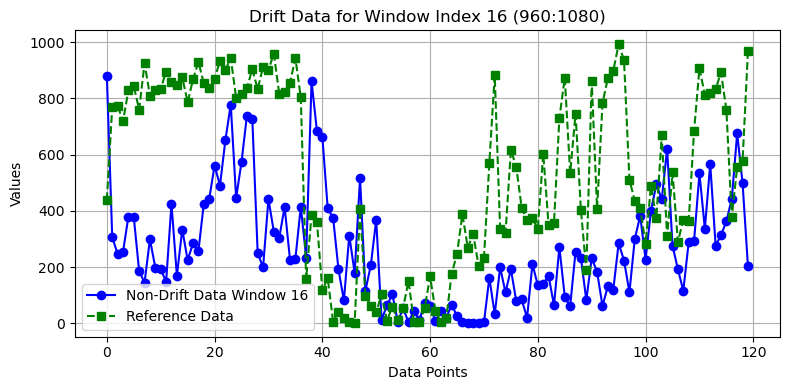

Window Index: 9, Start: 540, End: 660, Reference Start: 420, Reference End: 540


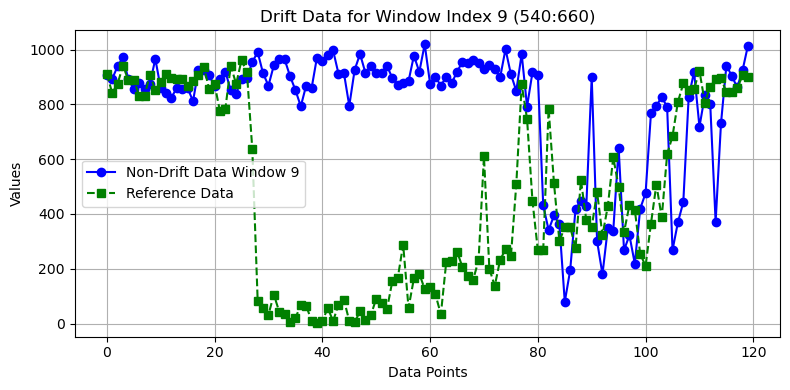

In [65]:
visualize(top_five_non_drifts['Window_Index'].tolist(), step_size, window_len, df_data, visualize_type='Non-Drift')

## 2.4 Visualization of P-values and Distance

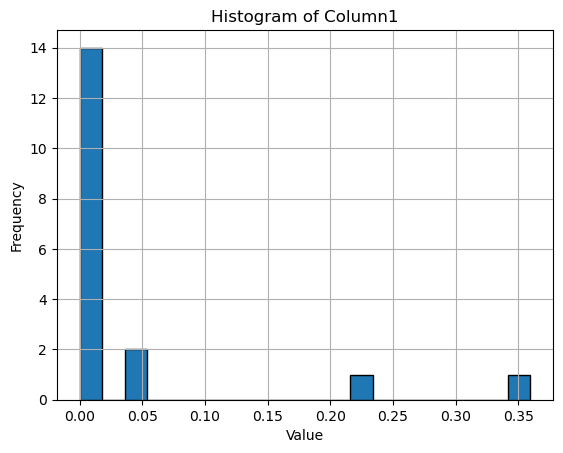

In [66]:
# Plotting a histogram for 'Column1'
df_preds['P_Value'].hist(bins=20, edgecolor='black')

# Adding titles and labels
plt.title('Histogram of Column1')
plt.xlabel('Value')
plt.ylabel('Frequency')

# Show the plot
plt.show()

# 3. Multivariate Feature Drift Detection

## 3.1 Drift Detection

In [67]:
# select feature category, window length and step size
categories = ['iops', 'read_write_ratio', 'write_size_ratio']
window_len = 120
step_size = 60

In [68]:
start = window_len
end = start + window_len
ref_start = 0
ref_end = window_len
preds = []

while end < len(df_data):
    # select reference data
    data_ref = df_data[categories].iloc[ref_start:ref_end].to_numpy()
    cd = KSDrift(data_ref, p_val=0.005, correction='fdr')

    x = df_data[categories].iloc[start:end].to_numpy()
    pred = cd.predict(x, drift_type='batch', return_p_val=True, return_distance=True)
    preds.append(pred)
    
    start += step_size
    end = start + window_len
    ref_start += step_size
    ref_end = ref_start + window_len

In [69]:
# Initialize lists to store data for plotting
window_indices = []
is_drift_values = []
p_val_values = []
distance_values = []
threshold_values = []

# Extract data for each prediction in preds
for idx, pred in enumerate(preds):
    window_indices.append(idx + 1)  # Assuming window index starts from 1
    is_drift_values.append(pred['data']['is_drift'])
    p_val_values.append(pred['data']['p_val'])
    distance_values.append(pred['data']['distance'])
    threshold_values.append(pred['data']['threshold'])

# Create a DataFrame from the lists
data_dict = {
    'Window_Index': window_indices,
    'Is_Drift': is_drift_values,
    'P_Value': p_val_values,
    'Distance': distance_values,
    'Threshold': threshold_values
}

df_preds = pd.DataFrame(data_dict)
df_preds

,Window_Index,Is_Drift,P_Value,Distance,Threshold
0,1,1,"[0.0005089932, 1.4578531e-05, 3.576926e-23]","[0.25833333, 0.30833334, 0.625]",0.005
1,2,1,"[0.014023404, 0.359647, 2.5426004e-19]","[0.2, 0.11666667, 0.575]",0.001667
2,3,1,"[9.366713e-05, 0.21630205, 0.0023470898]","[0.28333333, 0.13333334, 0.23333333]",0.003333
3,4,1,"[0.00016774009, 0.45050335, 7.816242e-22]","[0.275, 0.108333334, 0.60833335]",0.003333
4,5,1,"[2.382811e-10, 0.0008626642, 1.6998523e-12]","[0.425, 0.25, 0.46666667]",0.005
5,6,1,"[0.04455601, 2.0026966e-13, 9.3436483e-07]","[0.175, 0.48333332, 0.34166667]",0.003333
6,7,1,"[0.0092108855, 9.366713e-05, 5.1340012e-05]","[0.20833333, 0.28333333, 0.29166666]",0.003333
7,8,1,"[1.3139565e-11, 0.014023404, 5.1340012e-05]","[0.45, 0.2, 0.29166666]",0.003333
8,9,0,"[0.359647, 0.030840581, 0.21630205]","[0.11666667, 0.18333334, 0.13333334]","[0.0016666666666666668, 0.0033333333333333335,..."
9,10,1,"[1.4736501e-09, 7.550553e-06, 0.0092108855]","[0.40833333, 0.31666666, 0.20833333]",0.003333


In [70]:
num_drifts = df_preds['Is_Drift'].sum()
print(f'Number of drifts detected: {num_drifts}')

Number of drifts detected: 16


In [71]:
# Get drift_window_indices and no_drift_window_indices from DataFrame
drift_window_indices = df_preds[df_preds['Is_Drift'] == 1]['Window_Index'].tolist()
no_drift_window_indices = df_preds[df_preds['Is_Drift'] == 0]['Window_Index'].tolist()

## 3.2 Visualization of Predictions

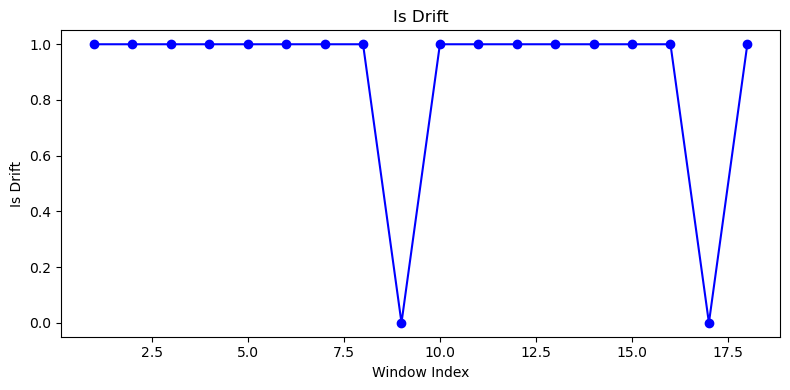

In [72]:
# Visualization example
plt.figure(figsize=(8, 4))

# Plot is_drift
plt.plot(window_indices, is_drift_values, marker='o', linestyle='-', color='b')
plt.title('Is Drift')
plt.xlabel('Window Index')
plt.ylabel('Is Drift')

plt.tight_layout()
plt.show()

In [73]:
drift_index = 12

if drift_index in drift_window_indices:
    print(f'Window {drift_index} is a drift window')

Window 12 is a drift window


In [74]:
data_ref.shape

(120, 3)

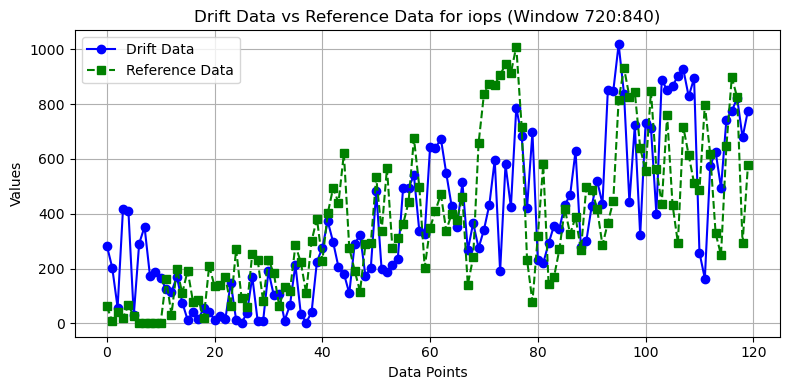

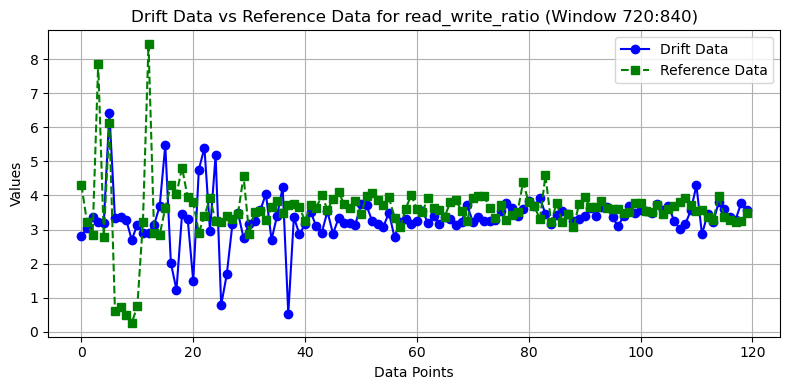

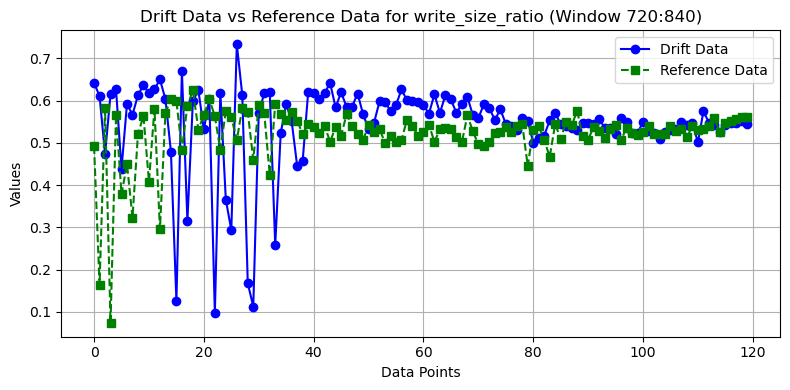

In [75]:
indices = np.arange(window_len)  

for idx, cate in enumerate(categories):
    start = drift_index * step_size
    end = start + window_len
    drift_data = df_data[cate].iloc[start:end].to_numpy()
    reference_data = data_ref[:,idx]

    # Plotting both drift data and reference data
    plt.figure(figsize=(8, 4))
    plt.plot(indices, drift_data, marker='o', linestyle='-', color='b', label='Drift Data')
    plt.plot(indices, reference_data, marker='s', linestyle='--', color='g', label='Reference Data')
    plt.title(f'Drift Data vs Reference Data for {cate} (Window {start}:{end})')
    plt.xlabel('Data Points')
    plt.ylabel('Values')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()


## 3.3 Check single feature 

In [76]:
p_values = pd.DataFrame(np.vstack(df_preds['P_Value'].values),columns=categories)
p_values

,iops,read_write_ratio,write_size_ratio
0,5.089932e-04,1.457853e-05,3.576926e-23
1,1.402340e-02,3.596470e-01,2.542600e-19
2,9.366713e-05,2.163021e-01,2.347090e-03
3,1.677401e-04,4.505033e-01,7.816242e-22
4,2.382811e-10,8.626642e-04,1.699852e-12
5,4.455601e-02,2.002697e-13,9.343648e-07
6,9.210886e-03,9.366713e-05,5.134001e-05
7,1.313956e-11,1.402340e-02,5.134001e-05
8,3.596470e-01,3.084058e-02,2.163021e-01
9,1.473650e-09,7.550553e-06,9.210886e-03


In [77]:
iops_p_values = p_values['iops'].sort_values().index[:5]
read_write_ratio_p_values = p_values['read_write_ratio'].sort_values().index[:5]
write_size_ratio_p_values = p_values['write_size_ratio'].sort_values().index[:5]
overlap_high_p_value_indices = iops_p_values.intersection(read_write_ratio_p_values).intersection(write_size_ratio_p_values)
overlap_high_p_value_indices

Index([], dtype='int64')

In [78]:
iops_low_p_values = p_values['iops'].sort_values(ascending=False).index[:5]
read_write_ratio_low_p_values = p_values['read_write_ratio'].sort_values(ascending=False).index[:5]
write_size_ratio_low_p_values = p_values['write_size_ratio'].sort_values(ascending=False).index[:5]

overlap_low_p_value_indices = iops_low_p_values.intersection(read_write_ratio_low_p_values).intersection(write_size_ratio_low_p_values)
overlap_low_p_value_indices

Index([16], dtype='int64')

# 4. Save Results

In [79]:
p_values_cate = [f'{cate}_pval' for cate in categories]
distance_cate = [f'{cate}_distance' for cate in categories]
p_vals = pd.DataFrame(np.vstack(df_preds['P_Value'].values), columns=p_values_cate)
distances = pd.DataFrame(np.vstack(df_preds['Distance'].values), columns=distance_cate)

In [80]:
df_results = pd.concat([df_preds[['Window_Index', 'Is_Drift']], p_vals, distances], axis=1)
df_results

,Window_Index,Is_Drift,iops_pval,read_write_ratio_pval,write_size_ratio_pval,iops_distance,read_write_ratio_distance,write_size_ratio_distance
0,1,1,5.089932e-04,1.457853e-05,3.576926e-23,0.258333,0.308333,0.625000
1,2,1,1.402340e-02,3.596470e-01,2.542600e-19,0.200000,0.116667,0.575000
2,3,1,9.366713e-05,2.163021e-01,2.347090e-03,0.283333,0.133333,0.233333
3,4,1,1.677401e-04,4.505033e-01,7.816242e-22,0.275000,0.108333,0.608333
4,5,1,2.382811e-10,8.626642e-04,1.699852e-12,0.425000,0.250000,0.466667
5,6,1,4.455601e-02,2.002697e-13,9.343648e-07,0.175000,0.483333,0.341667
6,7,1,9.210886e-03,9.366713e-05,5.134001e-05,0.208333,0.283333,0.291667
7,8,1,1.313956e-11,1.402340e-02,5.134001e-05,0.450000,0.200000,0.291667
8,9,0,3.596470e-01,3.084058e-02,2.163021e-01,0.116667,0.183333,0.133333
9,10,1,1.473650e-09,7.550553e-06,9.210886e-03,0.408333,0.316667,0.208333


In [81]:
df_results['overlapped_pvals_drift'] = 0
df_results.loc[overlap_high_p_value_indices, 'overlapped_pvals_drift'] = 1

df_results['overlapped_pvals_nondrift'] = 0
df_results.loc[overlap_low_p_value_indices, 'overlapped_pvals_nondrift'] = 1

In [82]:
for cate in categories:
    high_p_values_indices = p_values[cate].sort_values().index[:4]
    low_p_values_indices = p_values[cate].sort_values(ascending=False).index[:4]
    
    df_results[f'{cate}_pval_drift'] = 0
    df_results.loc[high_p_values_indices, f'{cate}_pval_drift'] = 1

    df_results[f'{cate}_pval_nondrift'] = 0
    df_results.loc[low_p_values_indices, f'{cate}_pval_nondrift'] = 1

In [83]:
index_arr = np.zeros((len(df_results), 2), dtype=int)

index_arr[:, 0] = np.arange(len(df_results)) * step_size
index_arr[:, 1] = index_arr[:, 0] + window_len * 2

index_arr[-1, -1] = min(len(df_data), index_arr[-1, -1])

index_df = pd.DataFrame(index_arr, columns=['start', 'end'])

In [84]:
df_results = pd.concat([df_results, index_df], axis=1)


In [85]:
df_results.head(10)

,Window_Index,Is_Drift,iops_pval,read_write_ratio_pval,write_size_ratio_pval,iops_distance,read_write_ratio_distance,write_size_ratio_distance,overlapped_pvals_drift,overlapped_pvals_nondrift,iops_pval_drift,iops_pval_nondrift,read_write_ratio_pval_drift,read_write_ratio_pval_nondrift,write_size_ratio_pval_drift,write_size_ratio_pval_nondrift,start,end
0,1,1,5.089932e-04,1.457853e-05,3.576926e-23,0.258333,0.308333,0.625000,0,0,0,0,1,0,1,0,0,240
1,2,1,1.402340e-02,3.596470e-01,2.542600e-19,0.200000,0.116667,0.575000,0,0,0,0,0,1,1,0,60,300
2,3,1,9.366713e-05,2.163021e-01,2.347090e-03,0.283333,0.133333,0.233333,0,0,0,0,0,0,0,0,120,360
3,4,1,1.677401e-04,4.505033e-01,7.816242e-22,0.275000,0.108333,0.608333,0,0,0,0,0,1,1,0,180,420
4,5,1,2.382811e-10,8.626642e-04,1.699852e-12,0.425000,0.250000,0.466667,0,0,1,0,0,0,1,0,240,480
5,6,1,4.455601e-02,2.002697e-13,9.343648e-07,0.175000,0.483333,0.341667,0,0,0,1,1,0,0,0,300,540
6,7,1,9.210886e-03,9.366713e-05,5.134001e-05,0.208333,0.283333,0.291667,0,0,0,0,0,0,0,0,360,600
7,8,1,1.313956e-11,1.402340e-02,5.134001e-05,0.450000,0.200000,0.291667,0,0,1,0,0,0,0,0,420,660
8,9,0,3.596470e-01,3.084058e-02,2.163021e-01,0.116667,0.183333,0.133333,0,0,0,1,0,0,0,1,480,720
9,10,1,1.473650e-09,7.550553e-06,9.210886e-03,0.408333,0.316667,0.208333,0,0,0,0,1,0,0,1,540,780


In [86]:
save_path = f'/home/cc/clio/drift-detection/output/ks_drift_results_{dataset_name}_{time_split}.csv'

df_results.to_csv(save_path, index=False)